In [1]:
from datasets import load_dataset_builder
from datasets import load_dataset
import pandas as pd

In [2]:
ds_builder = load_dataset_builder("amazon_us_reviews", "Books_v1_00")
ds_builder.info.features


{'marketplace': Value(dtype='string', id=None),
 'customer_id': Value(dtype='string', id=None),
 'review_id': Value(dtype='string', id=None),
 'product_id': Value(dtype='string', id=None),
 'product_parent': Value(dtype='string', id=None),
 'product_title': Value(dtype='string', id=None),
 'product_category': Value(dtype='string', id=None),
 'star_rating': Value(dtype='int32', id=None),
 'helpful_votes': Value(dtype='int32', id=None),
 'total_votes': Value(dtype='int32', id=None),
 'vine': ClassLabel(names=['N', 'Y'], id=None),
 'verified_purchase': ClassLabel(names=['N', 'Y'], id=None),
 'review_headline': Value(dtype='string', id=None),
 'review_body': Value(dtype='string', id=None),
 'review_date': Value(dtype='string', id=None)}

In [3]:
dataset = load_dataset("amazon_us_reviews", "Books_v1_00")

Found cached dataset amazon_us_reviews (C:/Users/ADMIN/.cache/huggingface/datasets/amazon_us_reviews/Books_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df = pd.DataFrame(dataset["train"][:100000])

In [5]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,25933450,RJOVP071AVAJO,0439873800,84656342,There Was an Old Lady Who Swallowed a Shell!,Books,5,0,0,0,1,Five Stars,I love it and so does my students!,2015-08-31
1,US,1801372,R1ORGBETCDW3AI,1623953553,729938122,I Saw a Friend,Books,5,0,0,0,1,"Please buy ""I Saw a Friend""! Your children wil...",My wife and I ordered 2 books and gave them as...,2015-08-31
2,US,5782091,R7TNRFQAOUTX5,142151981X,678139048,"Black Lagoon, Vol. 6",Books,5,0,0,0,1,Shipped fast.,Great book just like all the others in the ser...,2015-08-31
3,US,32715830,R2GANXKDIFZ6OI,014241543X,712432151,If I Stay,Books,5,0,0,0,0,Five Stars,So beautiful,2015-08-31
4,US,14005703,R2NYB6C3R8LVN6,1604600527,800572372,Stars 'N Strips Forever,Books,5,2,2,0,1,Five Stars,Enjoyed the author's story and his quilts are ...,2015-08-31


In [6]:
len(df["product_id"].unique())

74199

In [7]:
print(df["review_body"].iloc[101])

Trinity Church in Redlands, California, put together a Missionary Care Team which has been developing a system of proactive care for their missionary families since 2008. In this book they share their firsthand accounts along with results of their research on missionary care. Mind the Gaps is designed to equip your church with tools to create your own system of proactive care and reduce burnout and attrition.  A few things about this book are unusual. It’s written by a committee, rather than a single author. It’s written by and for church leaders, rather than from industry professionals. It also covers a broad array of related topics: everything from recruiting a missionary care team and establishing a philosophy of ministry to predicting missionary success and evaluating mission agencies, as well as more traditional topics of missionary care such as meeting spiritual, emotional, and practical needs and walking with missionaries through transitions.  The result is a bit overwhelming, a

In [8]:
sample_review = df["review_body"].iloc[12020]
print(sample_review)


My 2 year old son wants to read this every night and say &#34;Nigh-night Tuh!&#34; (Night-night Thomas). At first I thought it was silly that a book of all things would be glow-in-the-dark, but it's cute as a finishing touch to bedtime reading time. We just shine it under the light, then turn the light off and we easily see the moon and stars in it glow nice and bright. It's a cute short book, and the part with the owl seems super-randomly thrown in, but my son still loves it!


In [9]:
import html
decoded_review = html.unescape(sample_review)
print(decoded_review)

My 2 year old son wants to read this every night and say "Nigh-night Tuh!" (Night-night Thomas). At first I thought it was silly that a book of all things would be glow-in-the-dark, but it's cute as a finishing touch to bedtime reading time. We just shine it under the light, then turn the light off and we easily see the moon and stars in it glow nice and bright. It's a cute short book, and the part with the owl seems super-randomly thrown in, but my son still loves it!


In [10]:
pattern = r"\&\#[0-9]+\;"   

df["preprocessed"] = df["review_body"].str.replace(pat=pattern, repl="", regex=True)

print(df["preprocessed"].iloc[12020])

My 2 year old son wants to read this every night and say Nigh-night Tuh! (Night-night Thomas). At first I thought it was silly that a book of all things would be glow-in-the-dark, but it's cute as a finishing touch to bedtime reading time. We just shine it under the light, then turn the light off and we easily see the moon and stars in it glow nice and bright. It's a cute short book, and the part with the owl seems super-randomly thrown in, but my son still loves it!


In [11]:
%%time
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
df["preprocessed"] = df["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(df["preprocessed"].iloc[12020])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


My 2 year old son want to read this every night and say Nigh-night Tuh Night-night Thomas At first I think it be silly that a book of all thing would be glow-in-the-dark but it s cute as a finishing touch to bedtime reading time We just shine it under the light then turn the light off and we easily see the moon and star in it glow nice and bright It s a cute short book and the part with the owl seem super-randomly thrown in but my son still love it
CPU times: total: 55.3 s
Wall time: 9min 15s


In [12]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["preprocessed"] = df["preprocessed"].apply(remove_accent)

print(df["preprocessed"].iloc[12020])

My 2 year old son want to read this every night and say Nigh-night Tuh Night-night Thomas At first I think it be silly that a book of all thing would be glow-in-the-dark but it s cute as a finishing touch to bedtime reading time We just shine it under the light then turn the light off and we easily see the moon and star in it glow nice and bright It s a cute short book and the part with the owl seem super-randomly thrown in but my son still love it


In [13]:
attern = r"[^\w\s]"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[12020])

My 2 year old son want to read this every night and say Nigh-night Tuh Night-night Thomas At first I think it be silly that a book of all thing would be glow-in-the-dark but it s cute as a finishing touch to bedtime reading time We just shine it under the light then turn the light off and we easily see the moon and star in it glow nice and bright It s a cute short book and the part with the owl seem super-randomly thrown in but my son still love it


In [14]:
df["preprocessed"] = df["preprocessed"].str.lower()

print(df["preprocessed"].iloc[12020])

my 2 year old son want to read this every night and say nigh-night tuh night-night thomas at first i think it be silly that a book of all thing would be glow-in-the-dark but it s cute as a finishing touch to bedtime reading time we just shine it under the light then turn the light off and we easily see the moon and star in it glow nice and bright it s a cute short book and the part with the owl seem super-randomly thrown in but my son still love it


Removing Stop Words

In [15]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)

print(df["preprocessed"].iloc[12020])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

2 year old son want read every night say nigh-night tuh night-night thomas first think silly book thing would glow-in-the-dark cute finishing touch bedtime reading time shine light turn light easily see moon star glow nice bright cute short book part owl seem super-randomly thrown son still love


In [16]:
pattern = r"[\s]+"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[12020])

2 year old son want read every night say nigh-night tuh night-night thomas first think silly book thing would glow-in-the-dark cute finishing touch bedtime reading time shine light turn light easily see moon star glow nice bright cute short book part owl seem super-randomly thrown son still love


In [17]:
df.to_pickle("preprocessed.pkl")

## Tokenization

In [18]:
corpora = df["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]


In [19]:
print(tokenized[1232])

['small', 'difficult', 'put', 'quarter', 'hole']


## Phrase Modeling

In [20]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

### Unigrams

In [21]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['good-looking', 'ariel', 'com/ck', '/s/tom', 'jurist', 'veterans', 'evos', 'europeanization', 'melt-your-heart', 'summit', 'nonordinary', 'u-boats', 'sinthia', 'prohibitive', '-thank', 'implied', 'tolagson', 'necropolis', 'causality', 'scahill', 'off-beat', 'wild', 'vixen', 'dancy', 'voluptuous', 'flicka', '40k', 'comido', 'constituency', 'rigidness', 'weapons', 'markey', 'ormsbee', 'benny', 'dirtiest', 'preparing', 'no-holds-bar', 'nobody-', 'postpartum', 'turn-downs', 'breakthrough', 'parisians', 'info/notes', 'tannen', 'extravagantly', 'anothe', '2010s', 'elite/aristocratic', 'sailing', 'undertakingbut']


### Bigrams

In [22]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
# bi_gram_tokens = set([token.decode("utf-8") for token in bi_gram_tokens])
bi_gram_tokens = set([token for token in bi_gram_tokens])
bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['', 'would_highly', ':_<', 'many_year', 'nice_book', 'book_even', 'great_deal', 'happen_next', 'book_like', 'book_first', 'awesome_book', 'definitely_recommend', 'read_one', 'book_well', 'page_turner', 'book_come', 'book_excellent', 'beautiful_book', 'united_states', 'take_time', 'book_get', 'many_people', 'like_book', 'book_also', '>_also', 'main_character', 'would_recommend', 'would_love', 'great_read', 'really_good', 'put_book', 'book_help', 'pretty_much', 'well_<', 'wait_read', 'write_book', 'quick_read', 'love_book', 'wait_next', 'book_want', 'short_story', 'another_book', 'book_really', 'read_story', 'purchase_book', 'read_book', '>_receive', 'child_book', 'ever_read', 'use_book']


### Trigrams

In [23]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
# tri_gram_tokens = set([token.decode("utf-8") \
#                        for token in tri_gram_tokens])
tri_gram_tokens = set([token for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

['exchange_honest_review', 'would_highly_recommend', 'highly_recommend_book', '*_*_*', 'look_forward_read']


In [24]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[12020])

['year', 'old', 'son', 'want', 'read', 'every', 'night', 'say', 'nigh-night', 'tuh', 'night-night', 'thomas', 'first', 'think', 'silly', 'book', 'thing', 'would', 'glow-in-the-dark', 'cute', 'finishing', 'touch', 'bedtime', 'reading', 'time', 'shine', 'light', 'turn', 'light', 'easily', 'see', 'moon', 'star', 'glow', 'nice', 'bright', 'cute', 'short', 'book', 'part', 'owl', 'seem', 'super-randomly', 'thrown', 'son', 'still', 'love']


In [25]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: love
ID: 1, Token: student
ID: 2, Token: absolutely
ID: 3, Token: adorable
ID: 4, Token: artist
ID: 5, Token: artwork
ID: 6, Token: author
ID: 7, Token: book
ID: 8, Token: child
ID: 9, Token: daughter


In [26]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: love, Frequency: 1
Word: student, Frequency: 1


In [27]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: love, Weight: 0.380
Word: student, Weight: 0.925


In [28]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, vector_size=feature_size, window=context_size, min_count=min_word,epochs=50, seed=42)

CPU times: total: 2min 55s
Wall time: 3min 17s


# Final Dataframe

In [29]:
word_vec_unpack = [(word, idx) for word, idx in word_vec.wv.key_to_index.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.vectors[indexes, :], index=tokens)

display(word_vec_df.head(10))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
book,2.988494,1.163025,2.170204,-0.298272,1.601918,-1.686440,-1.085676,-1.409983,-0.473425,0.670158,...,1.497547,-0.236201,2.694505,0.959448,0.872549,0.300398,-0.765958,-2.210968,0.546591,-1.142887
br,-0.823468,0.906505,1.512885,0.904575,2.802195,0.154846,1.261950,2.584146,0.740068,-0.405492,...,1.899270,-0.113230,2.426141,0.642479,1.899484,-1.850297,-0.490373,-3.329592,-0.109165,1.365196
read,-0.232763,0.538449,-0.140718,1.463253,1.328935,-2.220216,1.540105,0.481370,-0.900277,2.602714,...,4.630993,-1.685797,2.781591,-0.951275,0.555015,1.330342,2.799127,-1.975841,1.451379,0.800224
great,-1.771536,-0.286775,0.906653,0.831850,0.699146,-0.972061,-0.573831,-1.386309,-1.015702,-1.169373,...,-0.925352,-1.363768,0.172582,2.055560,0.682888,0.948930,-0.078896,0.882178,1.592996,2.674292
love,-1.497047,0.476950,3.904043,2.071611,0.834199,1.155873,-3.023632,-0.820164,0.486981,1.903856,...,2.042653,-1.380676,3.376893,2.509193,-0.805332,0.186373,0.590138,2.895982,3.353379,1.510374
one,-1.044170,0.789181,2.102054,1.965349,0.011354,-0.667269,1.117622,1.713257,0.254144,2.103284,...,2.507533,0.343322,2.287220,0.417949,0.197259,-1.474247,-0.519986,-2.350720,1.980209,0.248210
story,0.240676,1.180555,0.737935,2.172831,3.774244,2.719812,-0.628018,0.774891,1.351547,4.227222,...,7.453152,1.796804,0.406790,4.716632,-5.735250,-0.829620,-2.028462,-2.151610,-0.737970,-1.027260
good,-2.654551,1.076171,2.337554,-0.352800,2.010078,-1.151793,-0.278105,-0.825613,-0.919342,-2.558366,...,-0.105450,-0.753826,0.824706,0.192185,4.129530,-0.944738,0.922291,-2.145657,2.528686,0.336505
like,-3.436861,3.067106,0.897464,1.746136,2.573544,-0.397287,-3.041096,-2.121943,-1.047985,1.487413,...,0.294490,2.396604,4.015279,0.533199,1.777071,-1.257030,1.213186,-3.301599,-0.603868,-2.126235
get,-3.144895,1.360550,3.431075,3.530612,-0.542174,-0.430258,0.161376,3.328349,-3.542235,-1.359743,...,1.180964,-3.344392,1.684825,0.600052,3.687501,1.526238,2.700072,-2.084073,1.457154,-2.321574


In [30]:
%%time
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

<timed exec>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


CPU times: total: 9.84 s
Wall time: 1min 16s


In [31]:
model_df = pd.DataFrame(model_array)
model_df["label"] = df["star_rating"]

display(model_df.head(20))

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-1.776174,2.558841,2.674800,0.401373,1.633184,0.111253,-1.912969,-0.109692,0.640796,-2.209424,...,-1.809824,0.959632,-1.728556,-0.660199,-1.701773,-0.671980,0.744675,-0.289446,-1.931618,5
1,0.236699,0.676732,0.516591,1.048837,-0.316419,0.310155,-0.315088,-0.379210,-0.295885,-0.113711,...,-0.183962,0.936549,0.498599,-0.363975,0.550066,-0.203459,-0.069996,0.360165,-0.493116,5
2,-0.286484,0.399678,2.229565,0.318288,1.034333,-1.006431,-1.727688,-1.976989,-0.771785,1.105250,...,-0.664306,0.615229,1.501484,0.860205,-0.621244,0.166003,-1.816321,1.051380,0.949255,5
3,-0.246984,0.930448,0.441583,1.583171,1.199903,2.709003,0.858633,-3.391812,3.390081,-1.462538,...,-3.246974,1.598013,3.709654,-2.494312,-0.267013,-0.744122,1.182188,-1.149549,4.794630,5
4,0.162029,-0.690768,1.274210,1.569664,-0.139489,0.600963,0.813250,0.720690,1.269323,0.852363,...,1.152653,1.698456,1.046839,-0.952212,-1.930059,0.255792,-1.034219,0.918080,0.580919,5
5,-0.223387,1.234246,0.914215,0.938108,0.761332,-0.373387,0.214874,0.400889,0.124422,0.821791,...,1.107911,1.478237,-0.228778,1.522224,-0.631783,-0.211659,-1.152080,0.137947,-0.524454,2
6,-0.324778,0.254324,-0.125951,0.311058,-0.127049,-0.175834,0.529465,0.414434,0.500413,1.314455,...,0.550305,0.722843,-0.476107,0.565052,0.122838,-0.088370,-0.952819,0.129543,-0.048247,5
7,-1.497047,0.476950,3.904043,2.071611,0.834199,1.155873,-3.023632,-0.820164,0.486981,1.903856,...,-1.380676,3.376893,2.509193,-0.805332,0.186373,0.590138,2.895982,3.353379,1.510374,5
8,0.880147,-2.182345,1.086375,-1.031402,-0.487345,0.005804,1.614871,-0.332042,-1.071505,-2.429039,...,-2.944641,-1.482630,1.056017,1.564488,1.397976,0.838232,-0.656168,0.738087,0.632599,5
9,1.435615,-0.065746,2.274253,-2.274132,2.671888,0.005052,2.224055,0.097212,0.296968,-0.924879,...,-1.333117,-4.731079,-0.202856,3.599334,0.724094,-0.366704,2.201396,0.690247,-0.379109,5


In [32]:
model_df.to_csv("finalized.csv")

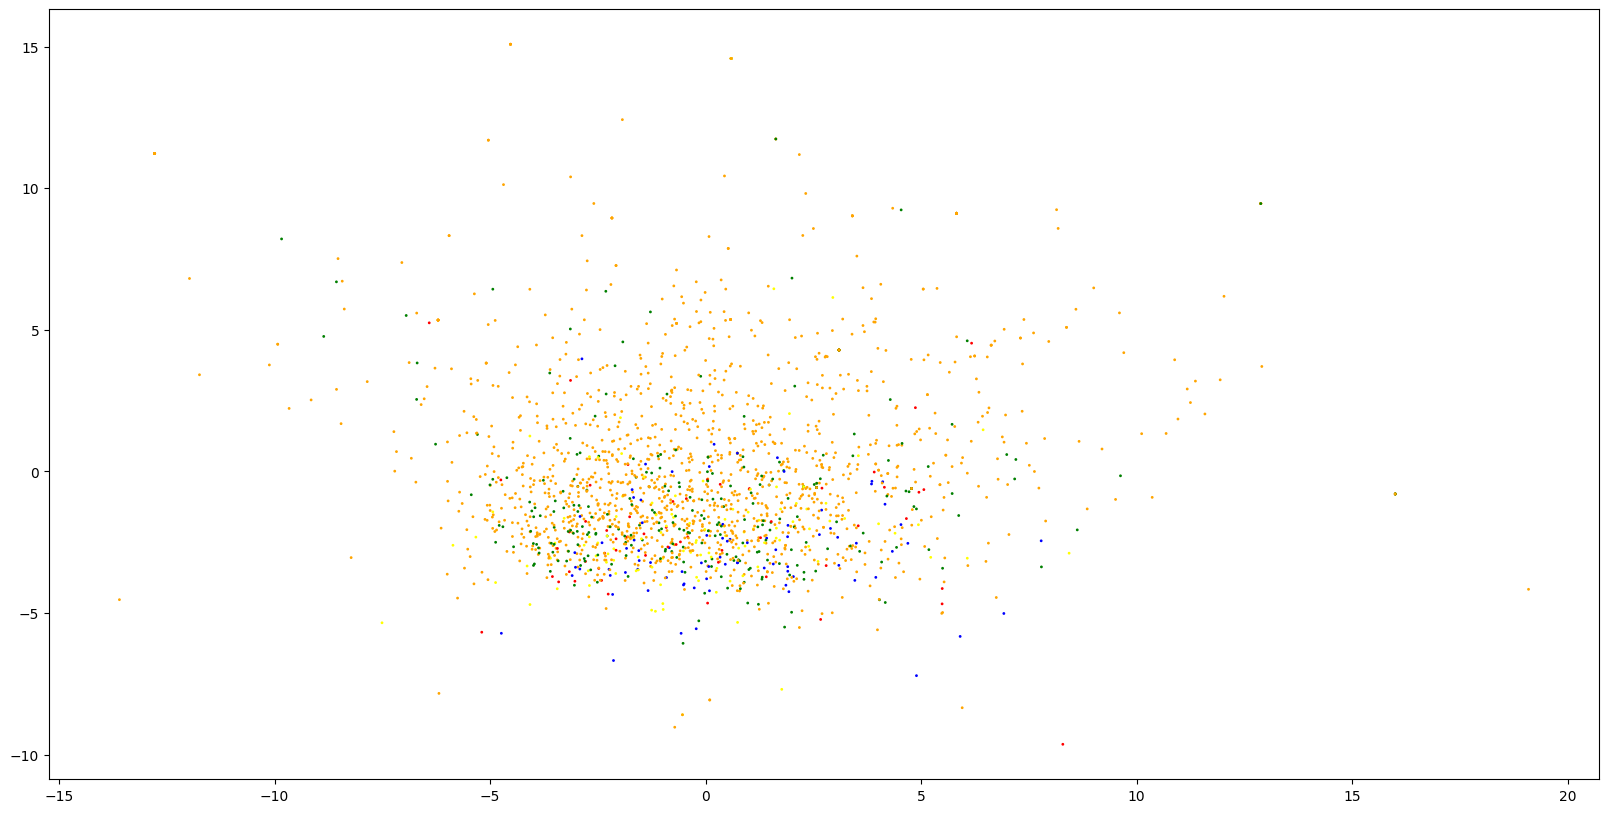

In [33]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
pca_df = pca_df.iloc[::50]

#setting up PCA
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
color_map = pca_df["label"].map({1:"blue", \
                                 2:"red", \
                                 3:"yellow", \
                                 4:"green", \
                                 5:"orange"})

#plotting PCA
f, axes = plt.subplots(figsize=(20,10))
plt.scatter(x_axis, y_axis, color=color_map, s=1)
plt.show()

In [34]:
import numpy as np

In [35]:
word_bank = ["books", "learning", "tv", "good", "price"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn = 5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

books: ['kota' '08/24/2015' 'blogging' 'philomel' 'morgantown']
learning: ['teach' 'learner' 'beginner/rising' 'learn' 'educator']
tv: ['television' 'hbo' 'csi' 'radio' 'pbs']
good: ['ok' 'decent' 'bad' 'nice' 'lot']
price: ['cost' 'cent' 'cheap' '99' 'expensive']


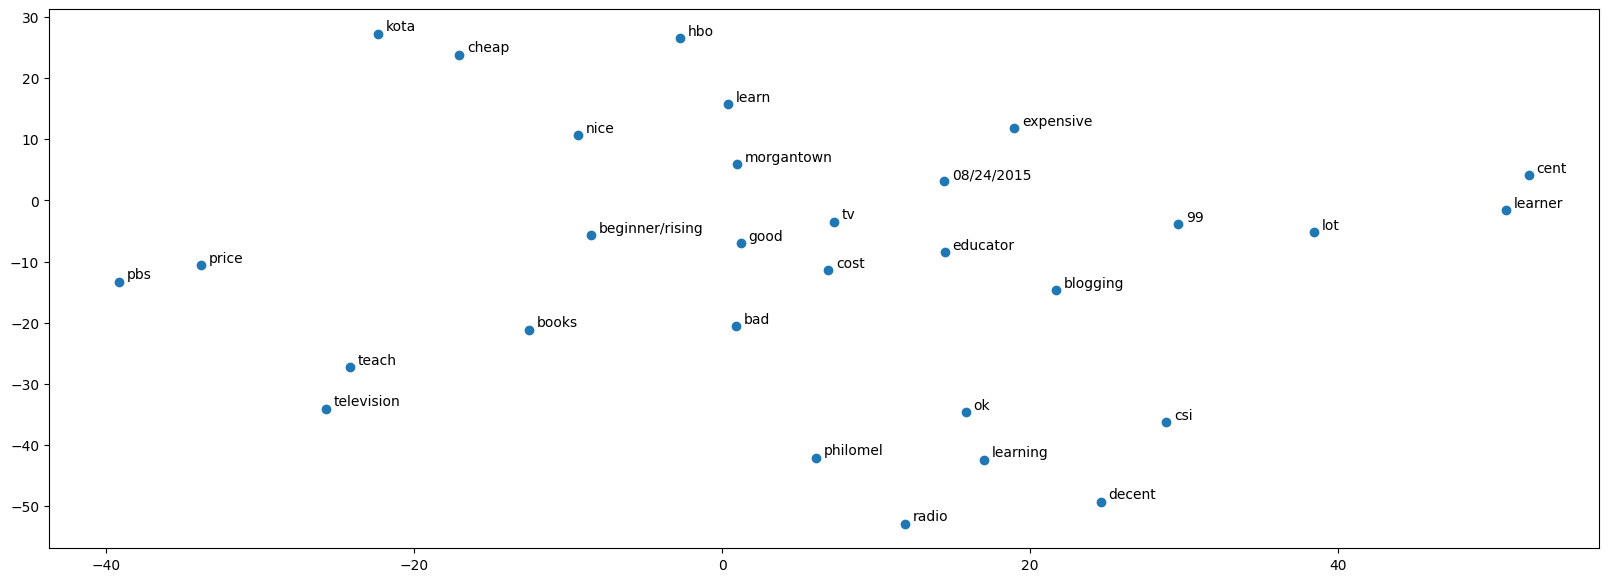

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x + 0.5, y + 0.5))

plt.show()

In [37]:
word_vec.wv.most_similar(positive=["books", "detective"], negative=[], topn=10)

[('dif', 0.5509160757064819),
 ('ayudante', 0.5306347608566284),
 ('desesperadamente', 0.5302394032478333),
 ('poisoned', 0.5292665958404541),
 ('descifrar', 0.5051339268684387),
 ('murders', 0.5012819766998291),
 ('claxton', 0.5009155869483948),
 ('mysteries', 0.49649128317832947),
 ('calzeta', 0.4939977526664734),
 ('busca', 0.49136459827423096)]

In [38]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'preprocessed'],
      dtype='object')

In [39]:
df[df["helpful_votes"].astype(str) == str(10)]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,preprocessed
377,US,45506744,R187EVBW1AQU23,1631210920,308149234,Road Trip USA Pacific Coast Highway,Books,5,10,10,0,1,Would buy again,"Very complete, very thorough. I bought 3 book...",2015-08-31,complete thorough buy 3 book pacific coast hig...
595,US,11798161,RUAP8UUKNRZUZ,1611800900,524460848,Your Body Knows the Answer: Using Your Felt Se...,Books,5,10,11,0,0,Read this book,I have an extensive background in Focusing and...,2015-08-31,extensive background focusing less background ...
876,US,37292515,R31MT0HO0DXWS,1938895282,459316663,"The Year One Challenge for Women: Thinner, Lea...",Books,5,10,11,0,1,Like it,"Just a few weeks into this, but I love it. Thi...",2015-08-31,week love workbook record result help tell exa...
976,US,40885166,R301ZZ6MG3QGIZ,1451645856,921981382,Ordinary Grace,Books,2,10,13,0,1,The Plot Deteriorates Into The Implausible,This book started off with great promise but s...,2015-08-31,book start great promise soon become load ster...
1031,US,39771395,R29K7Y897IOB50,1472808991,263835916,US Marine vs NVA Soldier: Vietnam 1967–68 (Com...,Books,5,10,10,0,1,I recommend this book.,This book drew my interest as I was in the Cor...,2015-08-31,book draw interest corps fight nva 68 - 69 att...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95856,US,9229353,RPEYUUZYVDBPD,2913621074,768026784,History: Fiction or Science? Dating methods as...,Books,5,10,11,0,0,Have you ever seen something so stupid that yo...,I didn't want to be suckered into giving this ...,2015-08-23,want suckered give guy money help one interest...
95879,US,31844889,R13NI3ASI28WGG,0679644423,494820528,"My Paris Dream: An Education in Style, Slang, ...",Books,1,10,11,0,0,Self-promoting and pretentious,I suppose it would have helped if I were into ...,2015-08-23,suppose would help fashion find write pretenti...
96278,US,14231528,RG6MLYTC0FDI2,0007589166,601575418,Collins Official Scrabble Words,Books,5,10,10,0,1,Compares Favorably with North American Scrabbl...,"Most importantly, this book offers what cannot...",2015-08-23,importantly book offer obtain north american v...
97576,US,47099794,R2PWF85W74A4WC,1569069670,144835984,Sixty Things to Do When You Turn Sixty: 60 Exp...,Books,5,10,12,0,1,I found it to be full of hope and joy; especia...,I received this book as a gift on my 60th birt...,2015-08-23,receive book gift 60th birthday several year a...


In [40]:
helpful = df["helpful_votes"].tolist()
# most_helpful = max(helpful, key=lambda x: x[0])

most_helpful_idx = df["helpful_votes"].astype(str) == str(10)
most_helpful_idx = df[most_helpful_idx].index

most_helpful_text = df["review_body"].iloc[most_helpful_idx].values[10]

print(most_helpful_text)

Reading this I get the sense that the writer, Cheryl &#34;Strayed&#34;, was trying to prove to herself that she could throw together a book. She even briefly mentions in the book that she had always dreamed of writing a novel because of being such an avid reader. Props to her. But just because someone wrote a book doesn't mean they necessarily can write one. Throughout the whole book you are left with a sense of unfulfillment, constantly waiting for some kind of resolution, thread, or something. This relief never comes. Instead you get a character with a personality that was unrelatable, and at times, frankly, highly irritating. Cheryl has spurts of great writing, throwing back to her miserable childhood or scenes of her dying mother and her pathetic drug episode with Joe - it will make you shed a tear or two. But to me, the book was pointless. There are people that have done much crazier stuff than hitchhike half a trail and barely make it to each supply station before blowing all the

In [41]:
%%time
import spacy

from collections import defaultdict

ner = spacy.load("en_core_web_sm")

ner_helpful = ner(most_helpful_text)

ner_dict = defaultdict(list)
for entity in ner_helpful.ents:
    ner_dict[entity.label_].append(entity)

for NER, name in ner_dict.items():
    print(f"{NER}:\n{name}\n")

ORG:
[Cheryl &, Snapple]

MONEY:
[34;Strayed&#34]

PERSON:
[Cheryl, Joe, Cheryl]

CARDINAL:
[two, half]

PERCENT:
[75%]

CPU times: total: 312 ms
Wall time: 2.15 s


In [42]:
from spacy import displacy

displacy.render(ner_helpful, style="ent", jupyter=True)

In [43]:
def ner_displacy(sentence):
    ner_sentence = ner(sentence)
    displacy.render(ner_sentence, jupyter=True, \
                    options={"compact": False, \
                             "distance": 90, \
                             "word_spacing":20, \
                             "arrow_spacing":10, \
                             "arrow_stroke": 2, \
                             "arrow_width": 5})

for sentence in most_helpful_text.split(".")[0:3]:
    ner_displacy(sentence)

In [44]:
%%time
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

br 0.047870092
book 0.01766587
story 0.010674284
read 0.007484492
get 0.0074287853
CPU times: total: 1min 7s
Wall time: 2min 49s


In [45]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 br, 0.04787009209394455
 book, 0.017665870487689972
 story, 0.01067428383976221
 read, 0.007484491914510727
 get, 0.007428785320371389

Topic 2:
 br, 0.023912135511636734
 book, 0.009353259578347206
 story, 0.008581718429923058
 read, 0.00756452651694417
 one, 0.007338592316955328

Topic 3:
 book, 0.04590234160423279
 br, 0.015130609273910522
 good, 0.010549469850957394
 read, 0.00918993353843689
 make, 0.008724065497517586

Topic 4:
 book, 0.028279516845941544
 br, 0.024223042652010918
 god, 0.010362492874264717
 read, 0.010060038417577744
 love, 0.008413577452301979

Topic 5:
 br, 0.06076585128903389
 book, 0.011371811851859093
 --, 0.007301681209355593
 get, 0.006347517482936382
 read, 0.006145185325294733

Topic 6:
 br, 0.03150362893939018
 one, 0.009795039892196655
 book, 0.008250531740486622
 story, 0.005068392027169466
 good, 0.004309502430260181

Topic 7:
 book, 0.05633646994829178
 read, 0.0383918471634388
 great, 0.03243594616651535
 story, 0.020598839968442917
 lo

## Machine Learning

In [51]:
nan_list = model_df[model_df[0].isna()].index
nan_list = nan_list.tolist()

print(nan_list[0:50])

[216, 992, 1760, 2905, 3583, 4257, 4626, 5519, 5623, 5732, 9264, 9271, 9315, 9871, 10780, 11981, 13037, 14089, 14825, 15687, 16198, 16230, 17631, 17679, 18961, 19075, 19313, 19713, 20315, 20892, 23867, 25338, 25709, 26510, 26528, 27162, 28475, 28535, 29360, 29366, 29449, 29854, 32020, 32626, 33333, 33526, 34461, 35959, 36177, 36357]


In [52]:
print(*[tokenized[blank] for blank in nan_list[0:5]])

[] [] [] [] []


In [53]:

for blank in nan_list[0:5]:
    display(df["review_body"].iloc[blank])

'👍👏💖😀'

''

':)'

':)'

"now if i'd just do it"

In [54]:
print(f"Original 'model_df' count: {len(model_df)}")
print(f"Final 'model_df' count: {len(model_df.dropna(axis=0))}")

model_df = model_df.dropna(axis=0)
display(model_df.head())

Original 'model_df' count: 100000
Final 'model_df' count: 99863


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-1.776174,2.558841,2.674800,0.401373,1.633184,0.111253,-1.912969,-0.109692,0.640796,-2.209424,...,-1.809824,0.959632,-1.728556,-0.660199,-1.701773,-0.671980,0.744675,-0.289446,-1.931618,5
1,0.236699,0.676732,0.516591,1.048837,-0.316419,0.310155,-0.315088,-0.379210,-0.295885,-0.113711,...,-0.183962,0.936549,0.498599,-0.363975,0.550066,-0.203459,-0.069996,0.360165,-0.493116,5
2,-0.286484,0.399678,2.229565,0.318288,1.034333,-1.006431,-1.727688,-1.976989,-0.771785,1.105250,...,-0.664306,0.615229,1.501484,0.860205,-0.621244,0.166003,-1.816321,1.051380,0.949255,5
3,-0.246984,0.930448,0.441583,1.583171,1.199903,2.709003,0.858633,-3.391812,3.390081,-1.462538,...,-3.246974,1.598013,3.709654,-2.494312,-0.267013,-0.744122,1.182188,-1.149549,4.794630,5
4,0.162029,-0.690768,1.274210,1.569664,-0.139489,0.600963,0.813250,0.720690,1.269323,0.852363,...,1.152653,1.698456,1.046839,-0.952212,-1.930059,0.255792,-1.034219,0.918080,0.580919,5


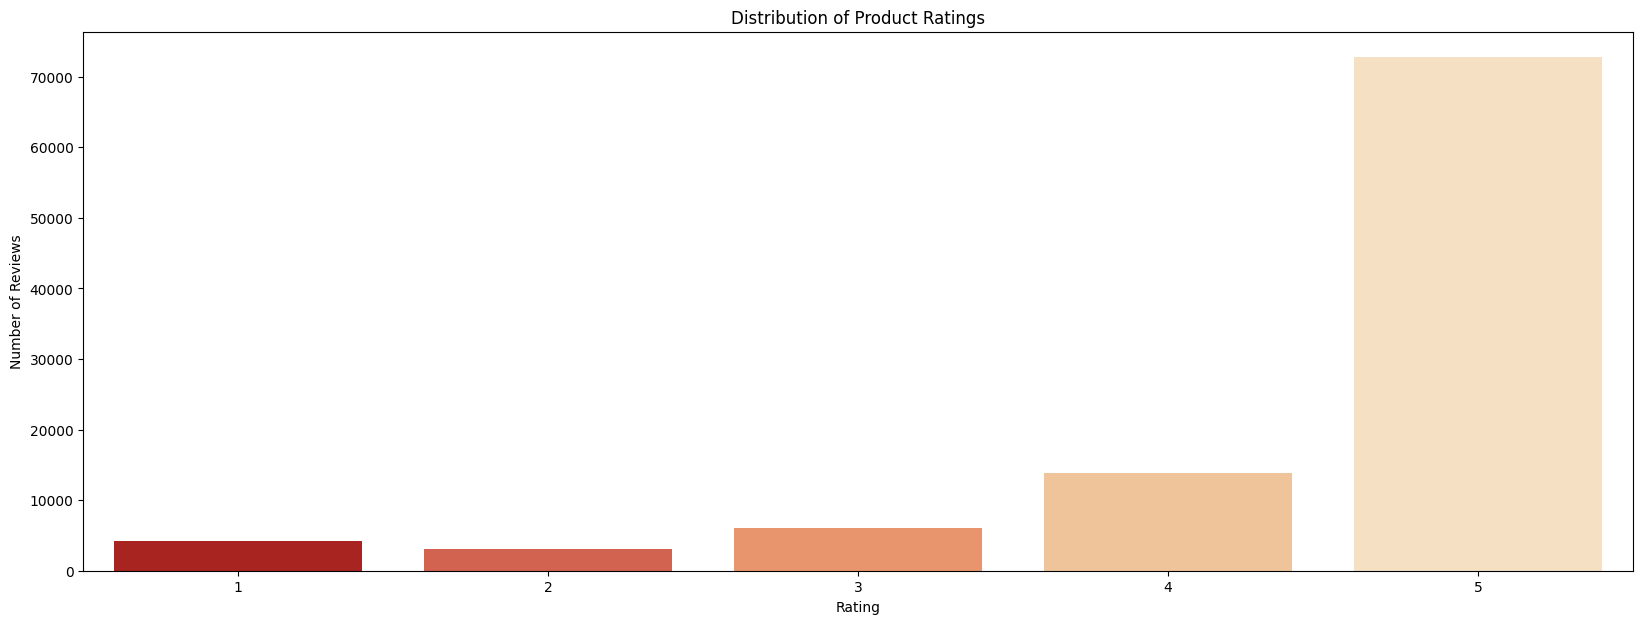

In [55]:
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["star_rating"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [56]:

majority = df["star_rating"] == 5
majority_ratio = len(df[majority]) / len(df)

print(f"{majority_ratio*100:.2f}%")

72.74%


In [80]:
count = len(model_df[model_df["label"] == 2])
print(f"Size of the most underrepresented class: {count}")

Size of the most underrepresented class: 3110


In [81]:
#trim the majority class
condition = model_df["label"] == 5
trimmed_df = model_df[condition].sample(n=count, random_state=42)

#trim other class and add on to the trimmed_df
for rating in [1, 2, 3, 4]:
    condition = model_df["label"] == rating
    if len(model_df[condition]) >= count:
        add_df = model_df[condition].sample(n=count, random_state=42)
    else:
        add_df = model_df[condition]
    trimmed_df = pd.concat([trimmed_df, add_df], ignore_index=False)

#display new class sizes of trimmed_df
for rating in [1, 2, 3, 4, 5]:
    class_size = len(trimmed_df[trimmed_df["label"] == rating])
    print(f"Size of Class {rating}: {class_size}")

Size of Class 1: 3110
Size of Class 2: 3110
Size of Class 3: 3110
Size of Class 4: 3110
Size of Class 5: 3110


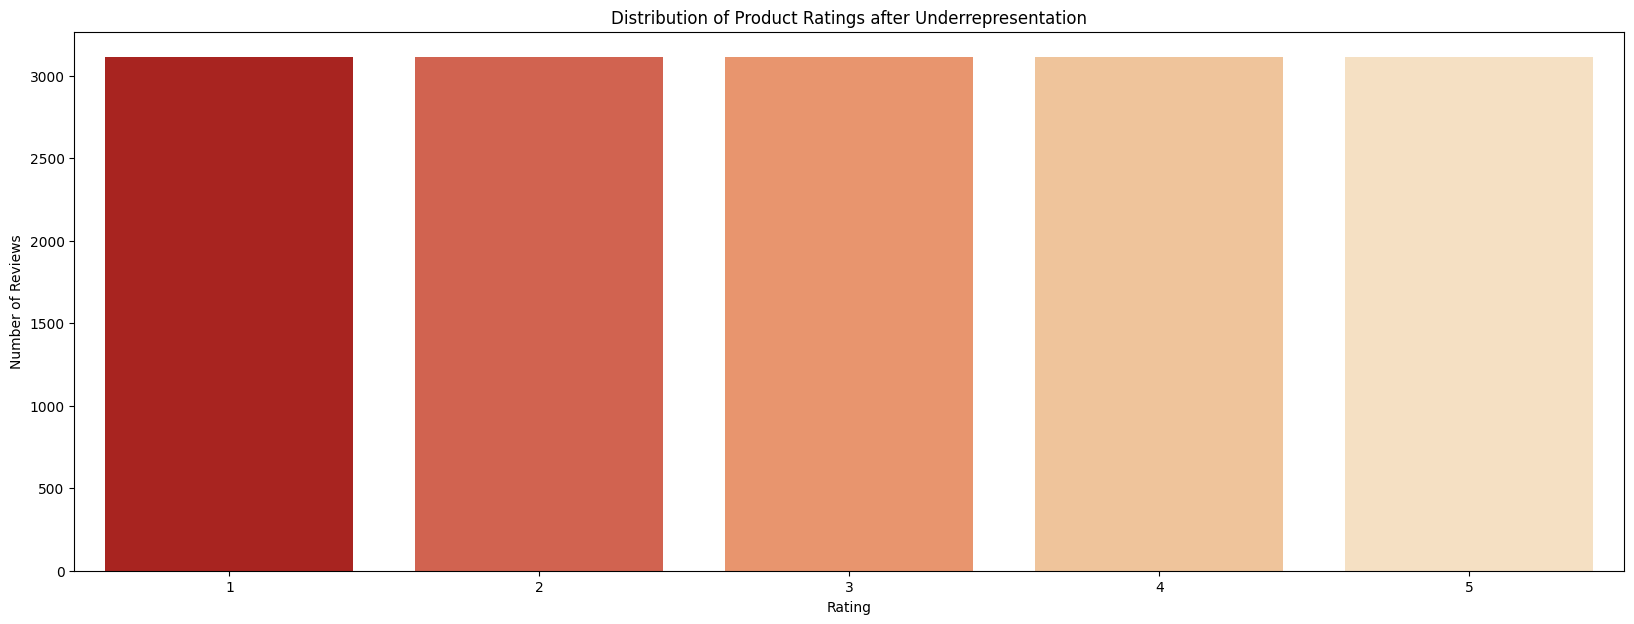

In [88]:

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=trimmed_df["label"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings after Underrepresentation", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [87]:

from sklearn.model_selection import train_test_split

X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [89]:
from sklearn import metrics

label_shape = np.shape(y_test)
y_baseline = np.full(label_shape, 5)

accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")

Baseline Accuracy: 20.000%
Baseline F1 Score: 0.200


In [90]:
from sklearn.model_selection import train_test_split

X = model_df.iloc[:, :-1]
y = model_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [91]:

%%time
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, class_weight={1:10, 2:12, 3:7, 4:9, 5:1}, \
                                criterion="entropy", random_state=42)
forest.fit(X_train, y_train)

CPU times: total: 15.5 s
Wall time: 35 s


RandomForestClassifier(class_weight={1: 10, 2: 12, 3: 7, 4: 9, 5: 1},
                       criterion='entropy', n_estimators=25, random_state=42)

In [92]:
y_pred = forest.predict(X_train)

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 96.123%
Training Set F1 Score: 0.961


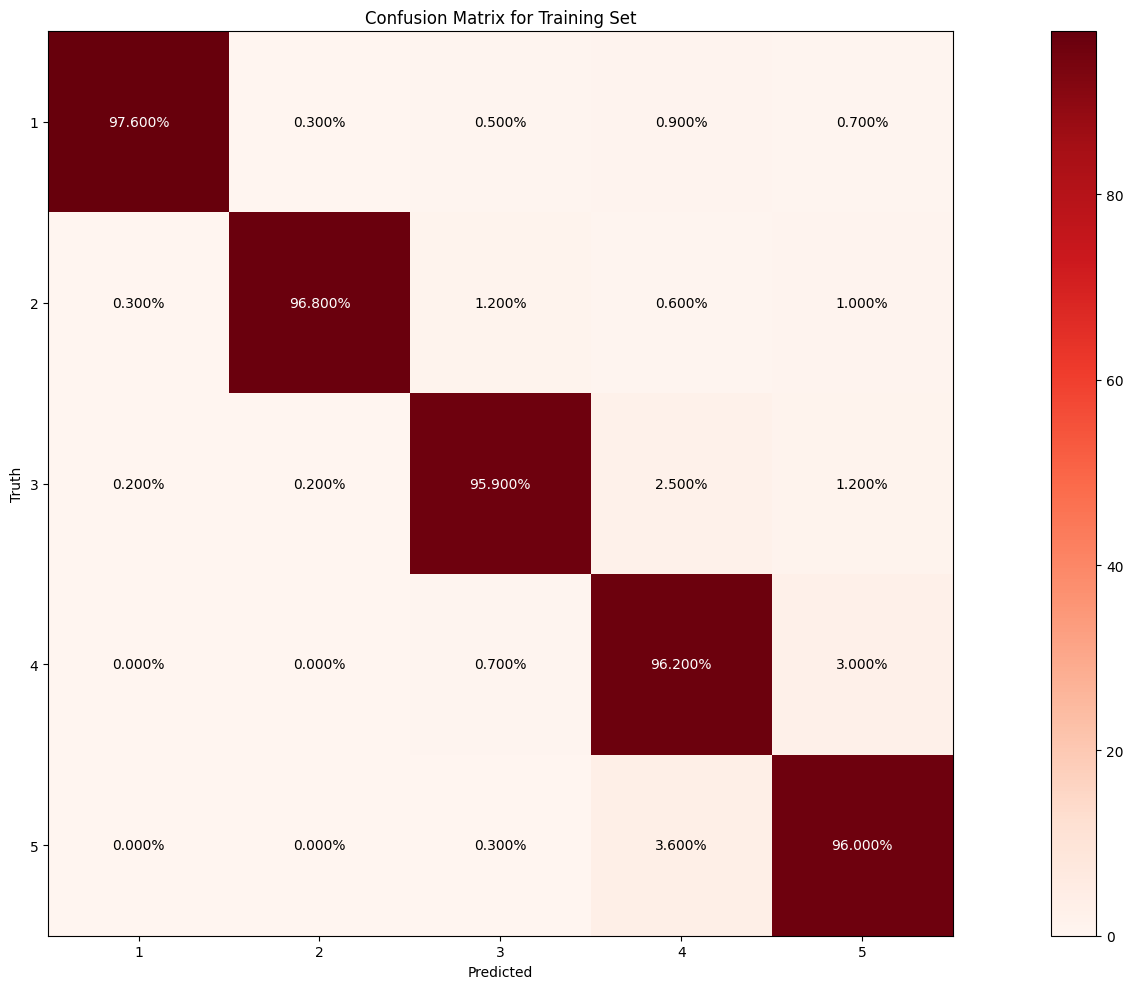

In [93]:
from sklearn.metrics import confusion_matrix

#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

In [94]:
from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="accuracy")
cross_val_f1 = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="f1_micro")

cross_val_accuracy = np.mean(cross_val_accuracy)
cross_val_f1 = np.mean(cross_val_f1)

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {cross_val_f1:.3f}")

Training Set Accuracy: 71.487%
Training Set F1 Score: 0.715


In [96]:
%%time
import xgboost as xgb

y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

parameters = {"max_depth": 10, "eta": 0.2, "silent": 1, \
              "objective": "multi:softprob", "num_class": 5}

boost = xgb.train(parameters, train_set, 100)

[20:50:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

CPU times: total: 33min 49s
Wall time: 4min


In [97]:
y_pred = boost.predict(train_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")


Training Set Accuracy: 97.993%
Training Set F1 Score: 0.980


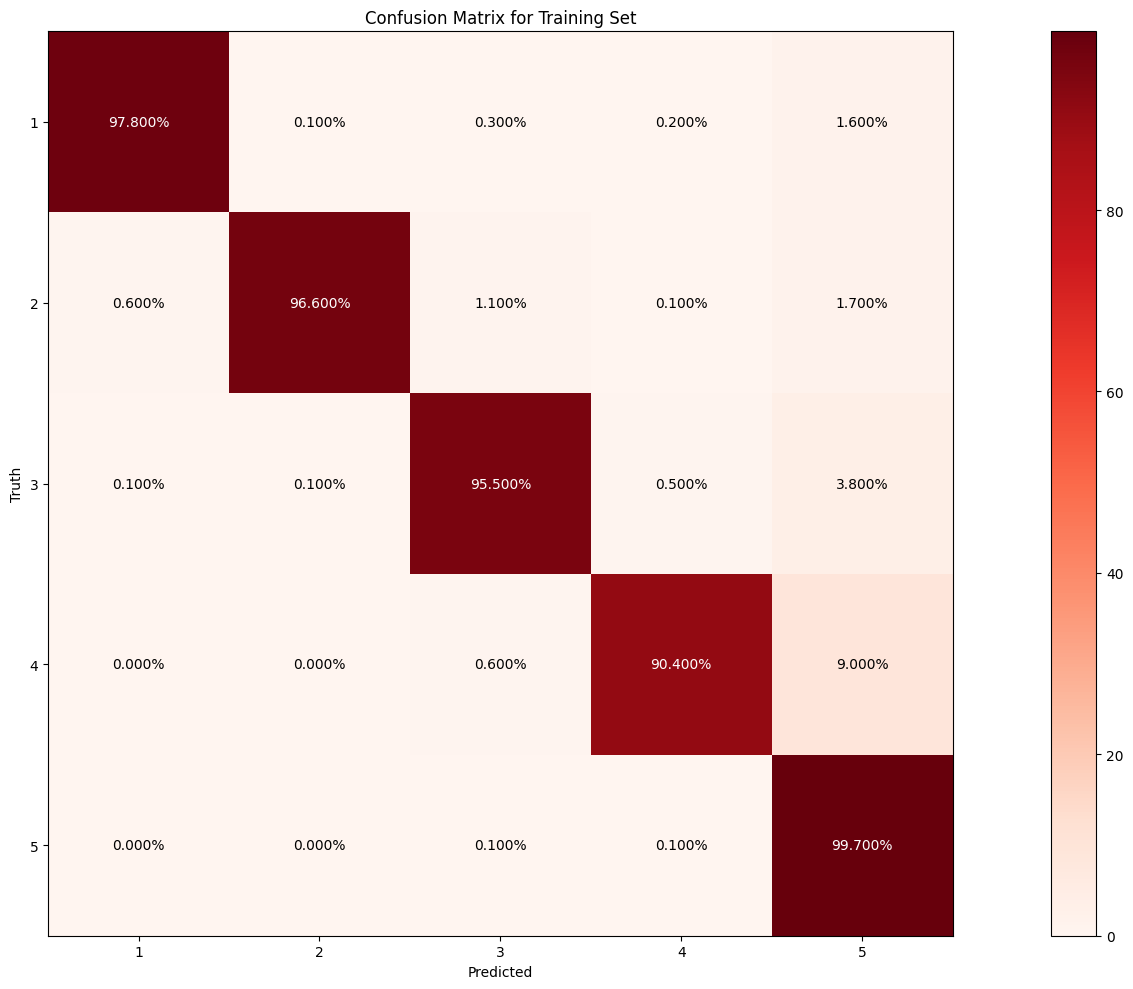

In [98]:
#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

In [99]:
%%time
boost_cv = xgb.cv(dtrain=train_set, params=parameters, nfold=3, \
                  num_boost_round=50, early_stopping_rounds=10, \
                  metrics="merror", as_pandas=True, seed=42)

display(boost_cv.head())

[20:54:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[20:54:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[20:55:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.185776,0.001510,0.290781,0.001710
1,0.169143,0.002492,0.274218,0.003194
2,0.158429,0.000860,0.269252,0.004567
3,0.150498,0.001373,0.266147,0.005066
4,0.141776,0.000928,0.263864,0.005480


CPU times: total: 27min 23s
Wall time: 2min 49s


In [100]:
cross_val_accuracy = boost_cv.iloc[-1,2]
cross_val_accuracy = 1-cross_val_accuracy

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")

Training Set Accuracy: 74.541%


## Final Scores

In [101]:
y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 74.798%
Test Set F1 Score: 0.748


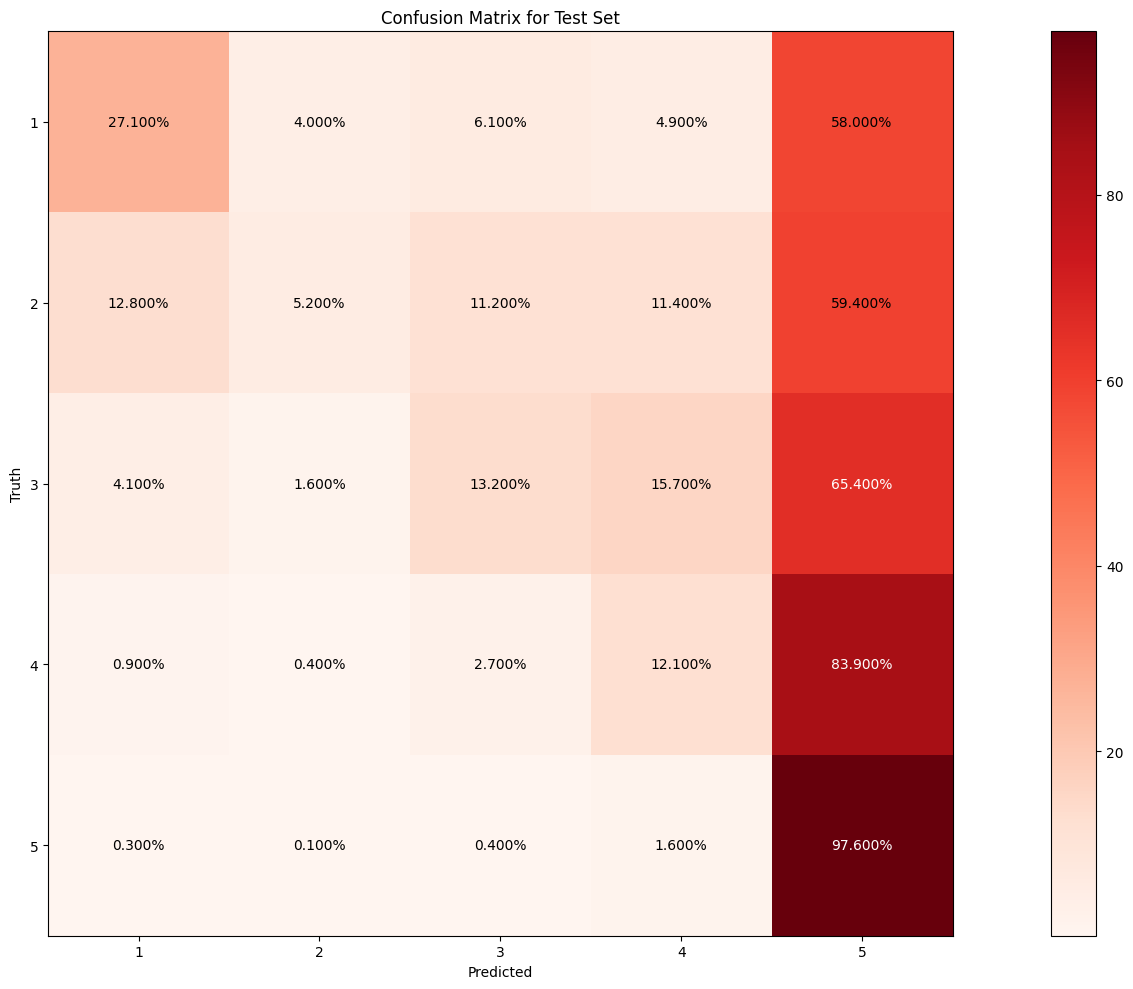

In [102]:
#create the confusion matrix of the test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

In [103]:
X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [104]:
y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Balanced Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Balanced Test Set F1 Score: {f1_score:.3f}")

Balanced Test Set Accuracy: 66.071%
Balanced Test Set F1 Score: 0.661


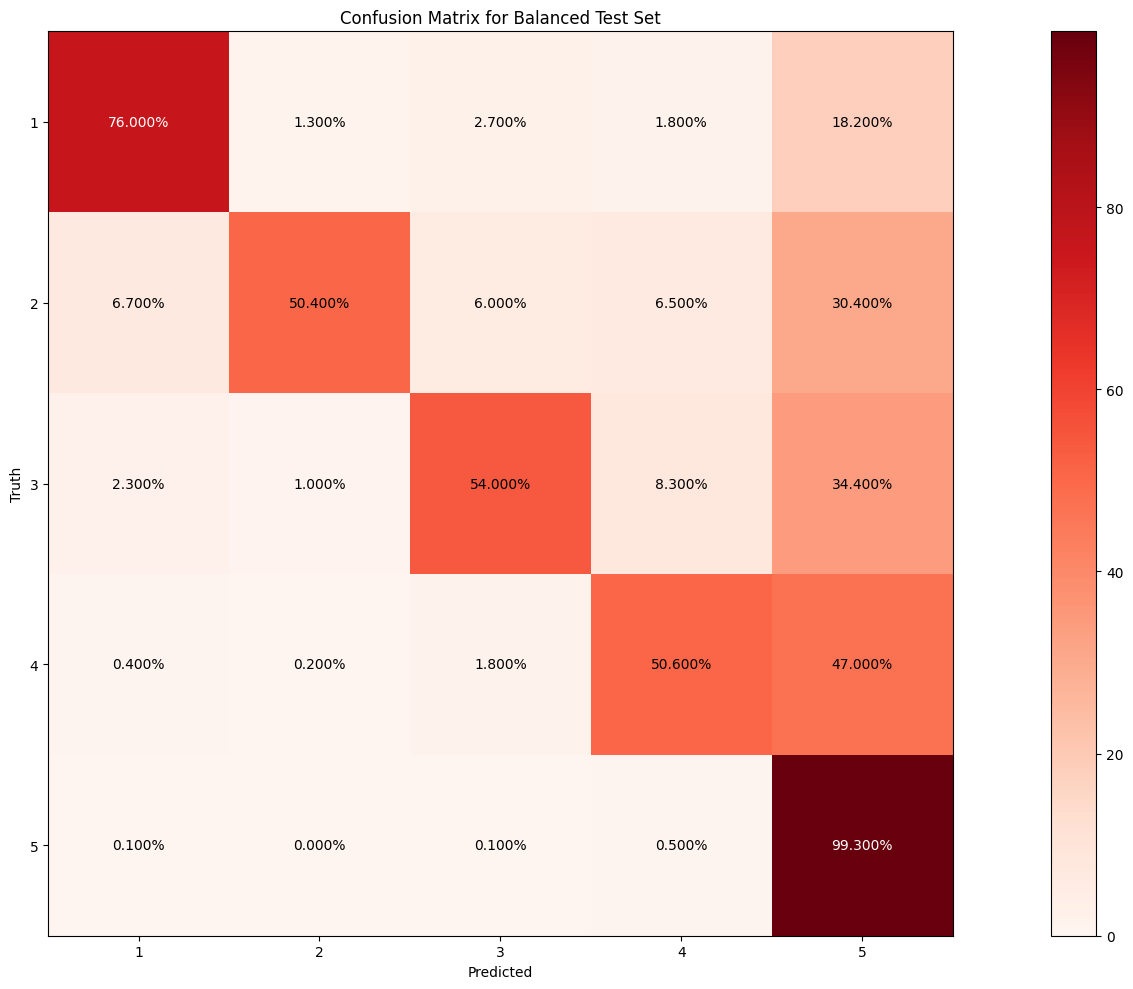

In [105]:
#create the confusion matrix of the balanced test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Balanced Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

c:\Users\ADMIN\anaconda3\envs\code\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


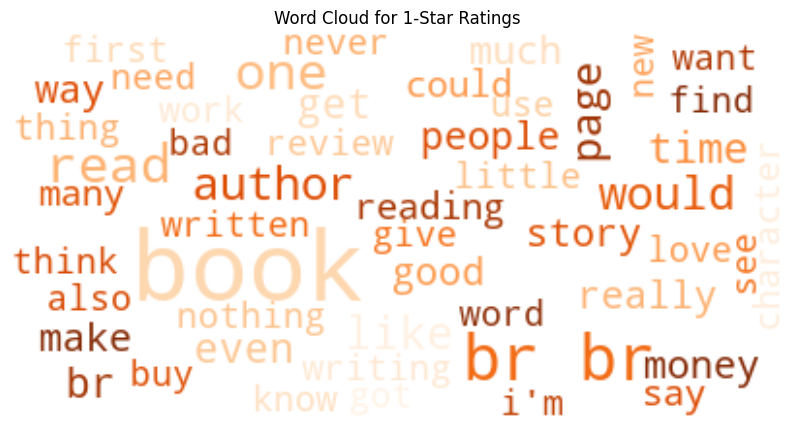

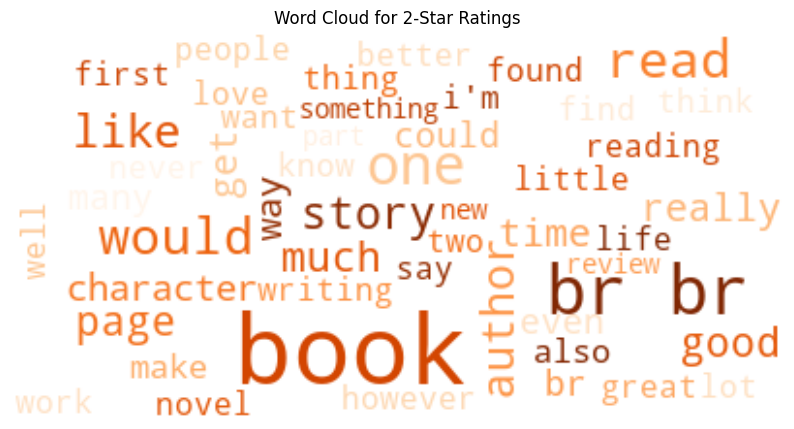

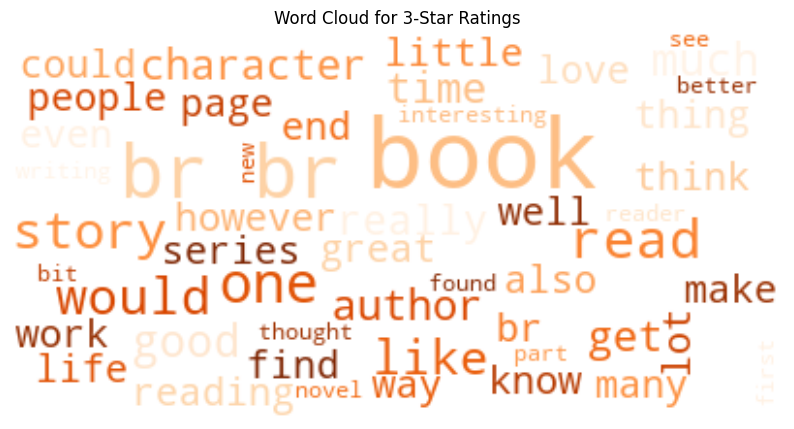

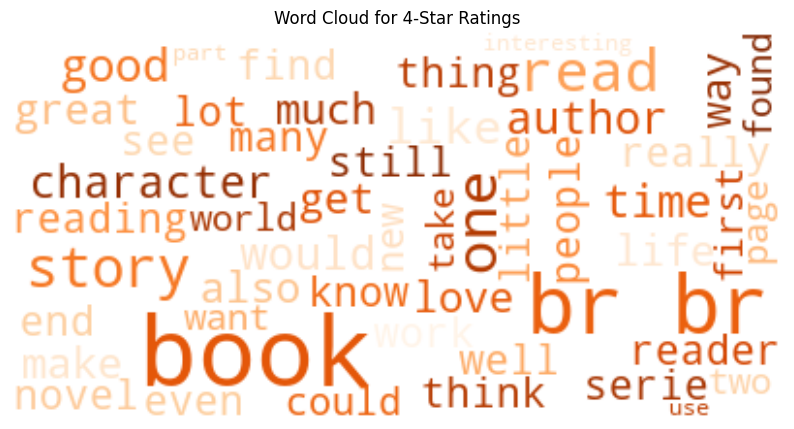

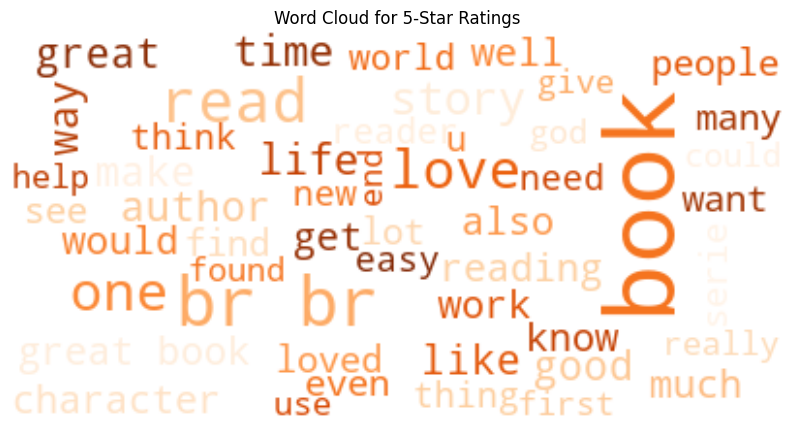

In [108]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(df[df["star_rating"]==1]["review_body"].values).lower()
two_star_text = " ".join(df[df["star_rating"]==2]["review_body"].values).lower()
three_star_text = " ".join(df[df["star_rating"]==3]["review_body"].values).lower()
four_star_text = " ".join(df[df["star_rating"]==4]["review_body"].values).lower()
five_star_text = " ".join(df[df["star_rating"]==5]["review_body"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()